In [1]:
pip install mlinsights

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 KB 2.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from mlinsights.mlmodel import KMeansL1L2
from sklearn.decomposition import PCA

1. Repeat Exercise 1 by performing PCA on data on Xis not on the labels. Reduce the dimension of the data to 2

In [4]:
df = pd.read_csv("haberman.csv")
df.columns = ["Age","YearOfOperation","NoOfPositiveAxillaryNodes","SurvivalStatus"]
df.head()

Age  YearOfOperation  NoOfPositiveAxillaryNodes  SurvivalStatus
0   30               64                          1               1
1   30               62                          3               1
2   30               65                          0               1
3   31               59                          2               1
4   31               65                          4               1

In [6]:
x = df.drop("SurvivalStatus",axis = 1)
y = df["SurvivalStatus"]

In [8]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x_scaled.head()

Age  YearOfOperation  NoOfPositiveAxillaryNodes
0 -2.082140         0.353584                  -0.421592
1 -2.082140        -0.262921                  -0.142959
2 -2.082140         0.661837                  -0.560909
3 -1.989426        -1.187680                  -0.282275
4 -1.989426         0.661837                  -0.003642

In [13]:
pca = PCA(n_components=2,random_state = 99).fit(x_scaled)
x = pca.transform(x_scaled)
x = pd.DataFrame(x,columns = ["A","B"])
x.head()

A         B
0  1.079952 -0.164819
1  1.552517 -0.292351
2  0.843669 -0.101052
3  1.963759 -0.937989
4  1.011230  0.355427

In [14]:
result_l1 = pd.DataFrame()
result_l2 = pd.DataFrame()
result_l1["k"] = list(range(1,6))
result_l2["k"] = list(range(1,6))
for j in [.4,.3,.2,.1]:
  print(f"For Train and Test Split {(1-j)*100} : {j*100}")
  X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = j,random_state = 99)
  print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
  print("Using L1 metric")
  result_l1_a = []
  for k in [1,2,3,4,5]:
    print("K =",k)
    knn = KNeighborsClassifier(n_neighbors = k,metric = "manhattan").fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print( "Accuracy: ",accuracy_score(y_test,y_pred))
    result_l1_a.append(accuracy_score(y_test,y_pred))
  print("Using L2 metric")
  result_l2_a = []
  for k in [1,2,3,4,5]:
    print("K =",k)
    knn = KNeighborsClassifier(n_neighbors = k,).fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print( "Accuracy: ",accuracy_score(y_test,y_pred))
    result_l2_a.append(accuracy_score(y_test,y_pred))
  result_l1[f"{(1-j)*100}:{j*100}"] = result_l1_a
  result_l2[f"{(1-j)*100}:{j*100}"] = result_l2_a
  print("---------------------------------------------")

For Train and Test Split 60.0 : 40.0
(183, 2) (123, 2) (183,) (123,)
Using L1 metric
K = 1
Accuracy:  0.5934959349593496
K = 2
Accuracy:  0.6585365853658537
K = 3
Accuracy:  0.6260162601626016
K = 4
Accuracy:  0.6666666666666666
K = 5
Accuracy:  0.6341463414634146
Using L2 metric
K = 1
Accuracy:  0.5772357723577236
K = 2
Accuracy:  0.6666666666666666
K = 3
Accuracy:  0.6097560975609756
K = 4
Accuracy:  0.6504065040650406
K = 5
Accuracy:  0.6341463414634146
---------------------------------------------
For Train and Test Split 70.0 : 30.0
(214, 2) (92, 2) (214,) (92,)
Using L1 metric
K = 1
Accuracy:  0.5869565217391305
K = 2
Accuracy:  0.6413043478260869
K = 3
Accuracy:  0.6195652173913043
K = 4
Accuracy:  0.6304347826086957
K = 5
Accuracy:  0.6086956521739131
Using L2 metric
K = 1
Accuracy:  0.5760869565217391
K = 2
Accuracy:  0.6413043478260869
K = 3
Accuracy:  0.5869565217391305
K = 4
Accuracy:  0.6195652173913043
K = 5
Accuracy:  0.6086956521739131
----------------------------------

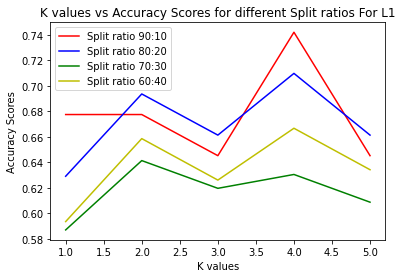

In [15]:
plt.plot(result_l1["k"],result_l1["90.0:10.0"],color = "r",label = "Split ratio 90:10")
plt.plot(result_l1["k"],result_l1["80.0:20.0"],color = "b",label = "Split ratio 80:20")
plt.plot(result_l1["k"],result_l1["70.0:30.0"],color = "g",label = "Split ratio 70:30")
plt.plot(result_l1["k"],result_l1["60.0:40.0"],color = "y",label = "Split ratio 60:40")
plt.xlabel("K values")
plt.ylabel("Accuracy Scores")
plt.title("K values vs Accuracy Scores for different Split ratios For L1")
plt.legend();

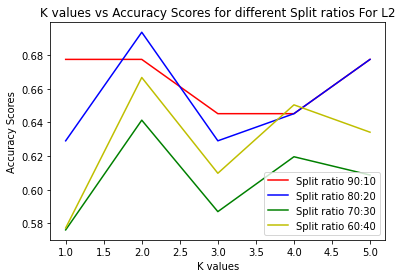

In [16]:
plt.plot(result_l2["k"],result_l2["90.0:10.0"],color = "r",label = "Split ratio 90:10")
plt.plot(result_l2["k"],result_l2["80.0:20.0"],color = "b",label = "Split ratio 80:20")
plt.plot(result_l2["k"],result_l2["70.0:30.0"],color = "g",label = "Split ratio 70:30")
plt.plot(result_l2["k"],result_l2["60.0:40.0"],color = "y",label = "Split ratio 60:40")
plt.xlabel("K values")
plt.ylabel("Accuracy Scores")
plt.title("K values vs Accuracy Scores for different Split ratios For L2")
plt.legend();

2. Repeat Exercise 2 by performing PCA on data and use K − Means clustering. Perform the experiment by
reducing the data to dimension 2 and 3. Plot the clusters in the 2-D case.

In [65]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing(as_frame=True)
df_1 = df.frame
df_2 = df.frame
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_1),columns = df_1.columns)

* Converting the data into 2 dimension using PCA

In [66]:
pca = PCA(n_components=2,random_state = 99).fit(df_scaled)
df_scaled = pca.transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled,columns = ["A","B"])
k = [2,3,4,5]
print("For L2")
for i in k:
  kmeans = KMeans(n_clusters = i , tol = 1e-3,random_state = 99,n_init = 'auto').fit(df_scaled)
  df_1[f"No Of Clusters K = {i}"] = kmeans.labels_
  df_scaled[f"No Of Clusters K = {i}(L2)"] = kmeans.labels_
df_1.head()

For L2


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  No Of Clusters K = 2  No Of Clusters K = 3  \
0    -122.23        4.526                     1                     2   
1    -122.22        3.585                     1                     2   
2    -122.24        3.521                     1                     1   
3    -122.25        3.413                     1                     1   
4    -122.25        3.422                     1                     1   

   No Of Clusters K = 4  No Of Clusters K = 5  
0                     2                     3  
1                     2                     3  
2                     1                     1  
3                     1                     1  
4                     1                     1

In [67]:
color = ["green","red","blue","yellow","cyan"]

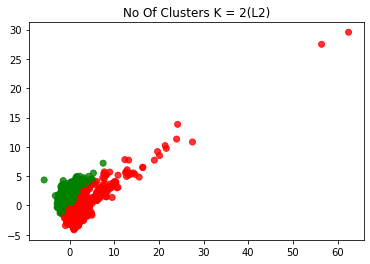

In [68]:
colors = [ color[df_scaled["No Of Clusters K = 2(L2)"][i]] for i in range(len(df_scaled))]
plt.scatter(df_scaled["A"],df_scaled["B"],c = colors,alpha = 0.8)
plt.title("No Of Clusters K = 2(L2)");

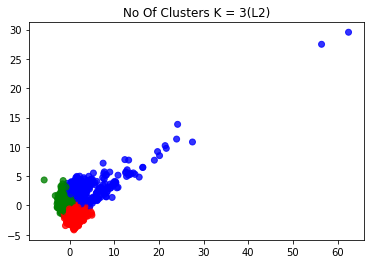

In [69]:
colors = [ color[df_scaled["No Of Clusters K = 3(L2)"][i]] for i in range(len(df_scaled))]
plt.scatter(df_scaled["A"],df_scaled["B"],c = colors,alpha = 0.8)
plt.title("No Of Clusters K = 3(L2)");

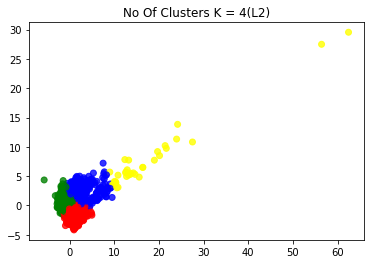

In [70]:
colors = [ color[df_scaled["No Of Clusters K = 4(L2)"][i]] for i in range(len(df_scaled))]
plt.scatter(df_scaled["A"],df_scaled["B"],c = colors,alpha = 0.8)
plt.title("No Of Clusters K = 4(L2)");

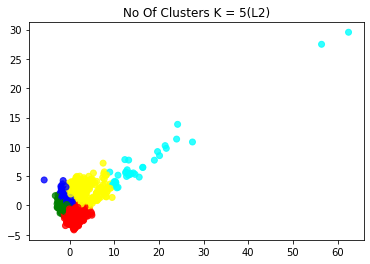

In [71]:
colors = [ color[df_scaled["No Of Clusters K = 5(L2)"][i]] for i in range(len(df_scaled))]
plt.scatter(df_scaled["A"],df_scaled["B"],c = colors,alpha = 0.8)
plt.title("No Of Clusters K = 5(L2)");

In [72]:
print("For L1 Norm")
for i in k:
  kml1 = KMeansL1L2(i, norm='L1',tol = 1e-3,random_state = 99).fit(df_scaled)
  df_2[f"No Of Clusters K = {i}"] = kml1.labels_
  df_scaled[f"No Of Clusters K = {i}(L1)"] = kml1.labels_
df_2.head()

For L1 Norm


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  No Of Clusters K = 2  No Of Clusters K = 3  \
0    -122.23        4.526                     1                     0   
1    -122.22        3.585                     1                     0   
2    -122.24        3.521                     1                     0   
3    -122.25        3.413                     1                     0   
4    -122.25        3.422                     1                     0   

   No Of Clusters K = 4  No Of Clusters K = 5  
0                     2                     2  
1                     2                     2  
2                     1                     1  
3                     1                     1  
4                     1                     1

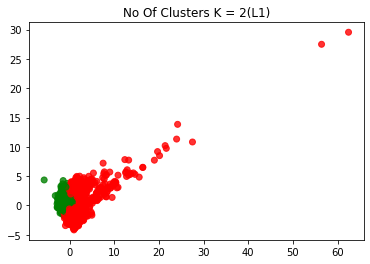

In [73]:
colors = [ color[df_scaled["No Of Clusters K = 2(L1)"][i]] for i in range(len(df_scaled))]
plt.scatter(df_scaled["A"],df_scaled["B"],c = colors,alpha = 0.8)
plt.title("No Of Clusters K = 2(L1)");

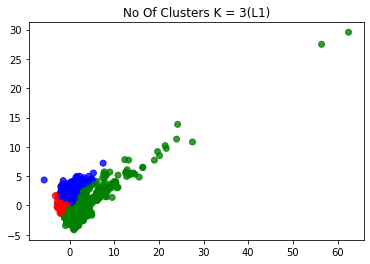

In [74]:
colors = [ color[df_scaled["No Of Clusters K = 3(L1)"][i]] for i in range(len(df_scaled))]
plt.scatter(df_scaled["A"],df_scaled["B"],c = colors,alpha = 0.8)
plt.title("No Of Clusters K = 3(L1)");

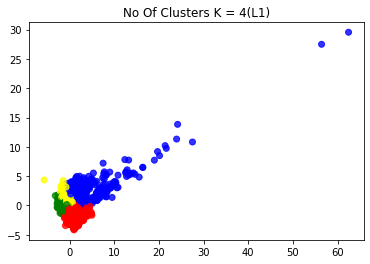

In [75]:
colors = [ color[df_scaled["No Of Clusters K = 4(L1)"][i]] for i in range(len(df_scaled))]
plt.scatter(df_scaled["A"],df_scaled["B"],c = colors,alpha = 0.8)
plt.title("No Of Clusters K = 4(L1)");

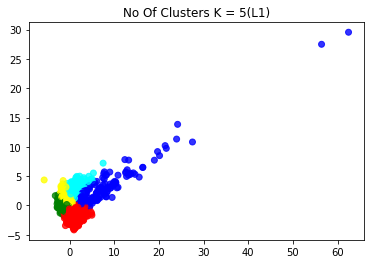

In [76]:
colors = [ color[df_scaled["No Of Clusters K = 5(L1)"][i]] for i in range(len(df_scaled))]
plt.scatter(df_scaled["A"],df_scaled["B"],c = colors,alpha = 0.8)
plt.title("No Of Clusters K = 5(L1)");

* Convert the data into 3 dimension using PCA

In [77]:
df = fetch_california_housing(as_frame=True)
df_1 = df.frame
df_2 = df.frame
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_1),columns = df_1.columns)

In [78]:
pca = PCA(n_components=3,random_state = 99).fit(df_scaled)
df_scaled = pca.transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled,columns = ["A","B","C"])
df_scaled.head()
k = [2,3,4,5]
print("For L2")
for i in k:
  kmeans = KMeans(n_clusters = i , tol = 1e-3,random_state = 99,n_init = 'auto').fit(df_scaled)
  df_1[f"No Of Clusters K = {i}"] = kmeans.labels_
df_1.head()

For L2


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  No Of Clusters K = 2  No Of Clusters K = 3  \
0    -122.23        4.526                     1                     2   
1    -122.22        3.585                     1                     2   
2    -122.24        3.521                     1                     2   
3    -122.25        3.413                     1                     1   
4    -122.25        3.422                     1                     1   

   No Of Clusters K = 4  No Of Clusters K = 5  
0                     2                     2  
1                     2                     2  
2                     2                     2  
3                     1                     2  
4                     1                     1

In [79]:
print("For L1 Norm")
for i in k:
  kml1 = KMeansL1L2(i, norm='L1',tol = 1e-3,random_state = 99).fit(df_scaled)
  df_2[f"No Of Clusters K = {i}"] = kml1.labels_
df_2.head()

For L1 Norm


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  No Of Clusters K = 2  No Of Clusters K = 3  \
0    -122.23        4.526                     1                     1   
1    -122.22        3.585                     1                     1   
2    -122.24        3.521                     1                     2   
3    -122.25        3.413                     1                     2   
4    -122.25        3.422                     1                     2   

   No Of Clusters K = 4  No Of Clusters K = 5  
0                     2                     0  
1                     2                     0  
2                     2                     0  
3                     2                     0  
4                     2                     0